In [2]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path1 = "Believer.wav"
file_path2 = "Believer_recorded.wav"
samples1, sampling_rate1 = librosa.load(file_path1, sr=None, mono=True, offset=0.0, duration=None)
samples2, sampling_rate2 = librosa.load(file_path2, sr=None, mono=True, offset=0.0, duration=None)

In [4]:
duration_of_sound1 = len(samples1)/sampling_rate1
duration_of_sound2 = len(samples2)/sampling_rate2
print(duration_of_sound1, "sec full sound")
print(duration_of_sound2, "sec part sound")

10.032086167800454 sec full sound
10.0 sec part sound


In [5]:
from IPython.display import Audio
Audio(file_path1)

In [6]:
Audio(file_path2)

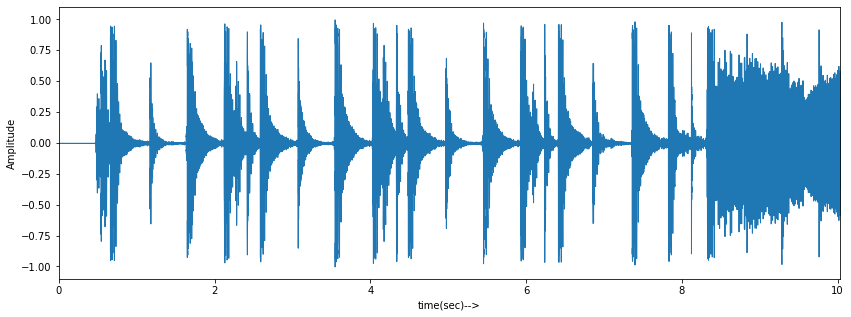

In [6]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(y=samples1, sr=sampling_rate1)
plt.xlabel("time(sec)-->")
plt.ylabel("Amplitude")
plt.show()

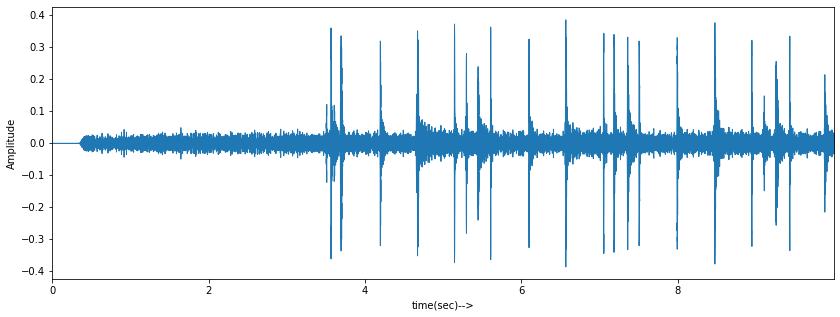

In [7]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(y=samples2, sr=sampling_rate2)
plt.xlabel("time(sec)-->")
plt.ylabel("Amplitude")
plt.show()

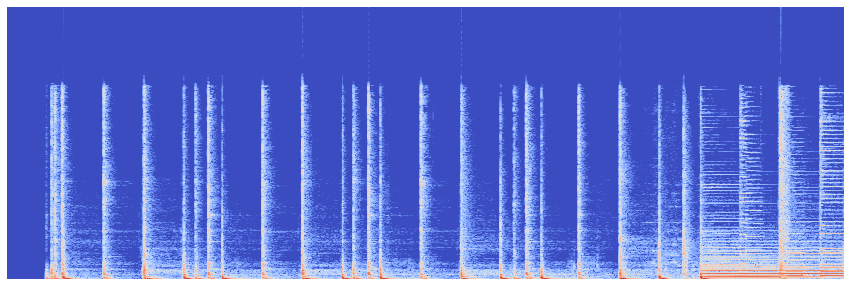

In [8]:
#fig_size1 = 15*duration_of_sound1/10\
fig_size1 = 15
X1 = librosa.stft(samples1)
Xdb1 = librosa.amplitude_to_db(abs(X1))
plt.figure(figsize=(fig_size1,5))
ax = plt.axes()
ax.set_axis_off()
librosa.display.specshow(Xdb1, sr=sampling_rate1, x_axis='time',y_axis='hz')
#plt.colorbar()
plt.savefig('Believerfull.png', bbox_inches='tight', transparent=True, pad_inches=0.0 )

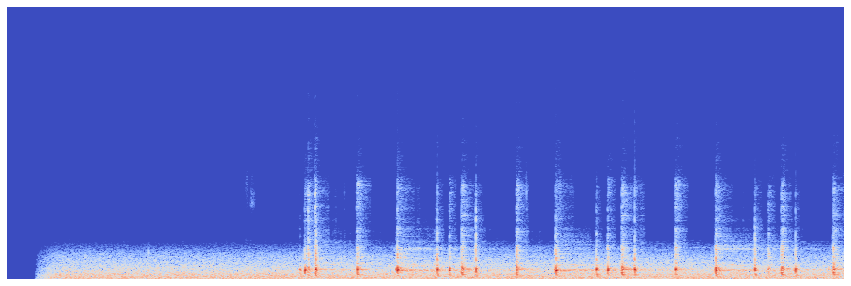

In [9]:
#fig_size2 = 15*duration_of_sound2/10
fig_size2 = 15
X2 = librosa.stft(samples2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(fig_size2,5))
ax = plt.axes()
ax.set_axis_off()
librosa.display.specshow(Xdb2, sr=sampling_rate2, x_axis='time',y_axis='hz')
#plt.colorbar()
plt.savefig('Believerrecorded.png', bbox_inches='tight', transparent=True, pad_inches=0.0 )

In [10]:
import cv2
import math

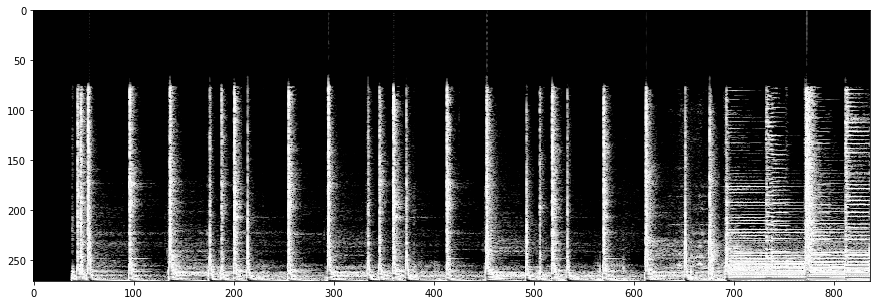

In [11]:
image1 = cv2.imread('Believerfull.png')
image_gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(fig_size1,5))
plt.imshow(image_gray1, cmap='gray')

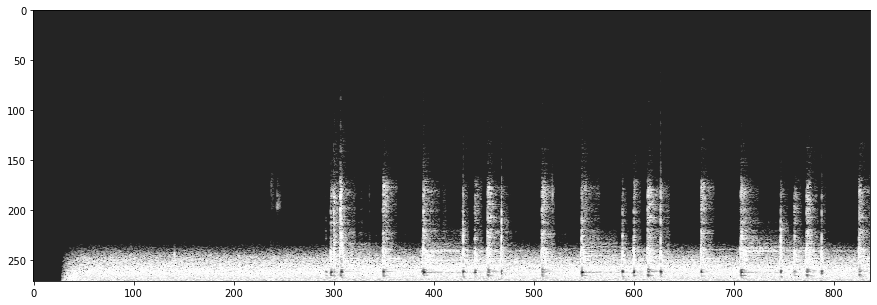

In [12]:
image2 = cv2.imread('Believerrecorded.png')
image_gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(fig_size2,5))
plt.imshow(image_gray2, cmap='gray')

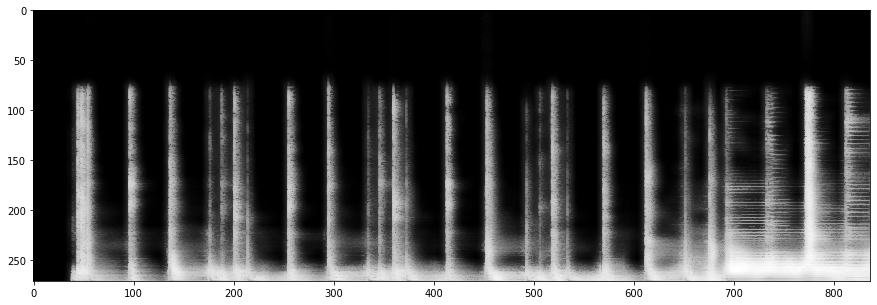

In [13]:
bilateral1 = cv2.bilateralFilter(image_gray1, 15,75,75)
plt.figure(figsize=(fig_size1,5))
plt.imshow(bilateral1, cmap='gray')

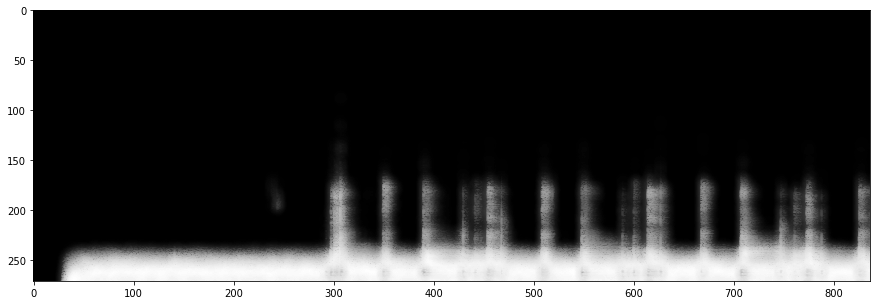

In [14]:
bilateral2 = cv2.bilateralFilter(image_gray2, 15,75,75)
plt.figure(figsize=(fig_size2,5))
plt.imshow(bilateral2, cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


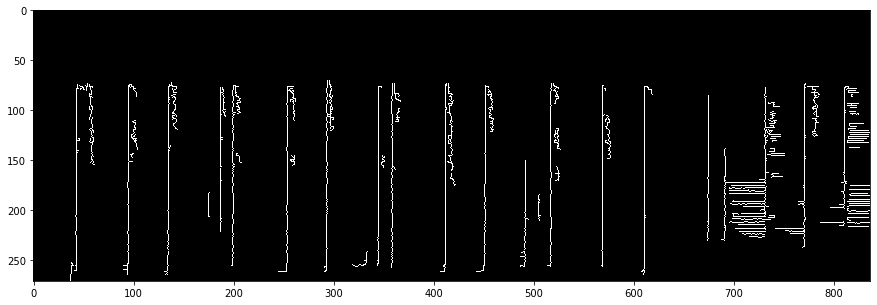

In [15]:
edges1 = cv2.Canny(bilateral1, 100, 200)
lines1 = cv2.HoughLines(edges1,1,np.pi/180,100)
plt.figure(figsize=(fig_size1,5))
plt.imshow(edges1, cmap='gray')

[[[667.   0.]]

 [[613.   0.]]

 [[453.   0.]]

 [[389.   0.]]

 [[349.   0.]]]


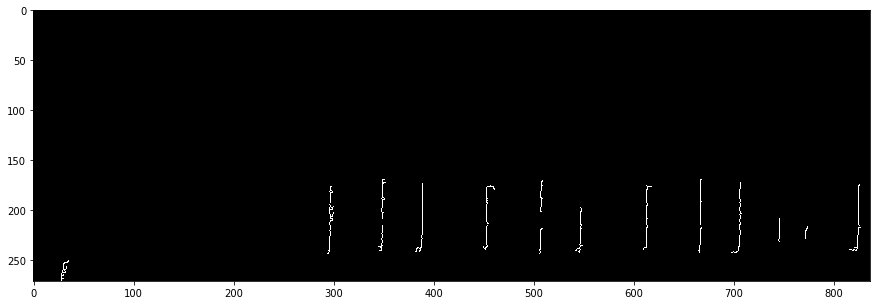

In [16]:
edges2 = cv2.Canny(bilateral2, 100, 200)
lines2 = cv2.HoughLines(edges2,1,np.pi/180,50)
print(lines2)
plt.figure(figsize=(fig_size2,5))
plt.imshow(edges2, cmap='gray')

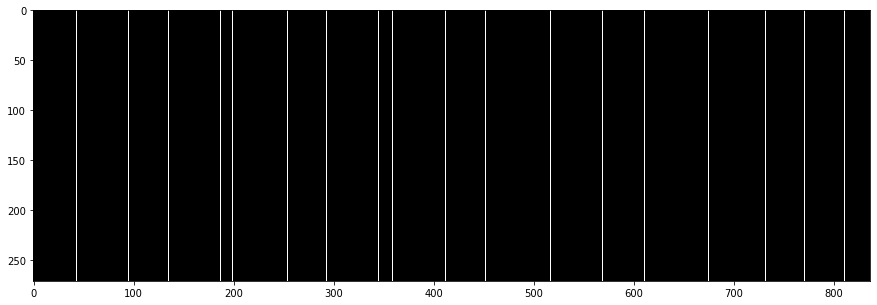

In [43]:
img1 = image_gray1*0
if lines1 is not None:
    for i in range(0, len(lines1)):
        rho = lines1[i][0][0]
        theta = lines1[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img1, pt1, pt2, (255,255,255), 1)
        
plt.figure(figsize=(15,5))
plt.imshow(img1,cmap='gray')

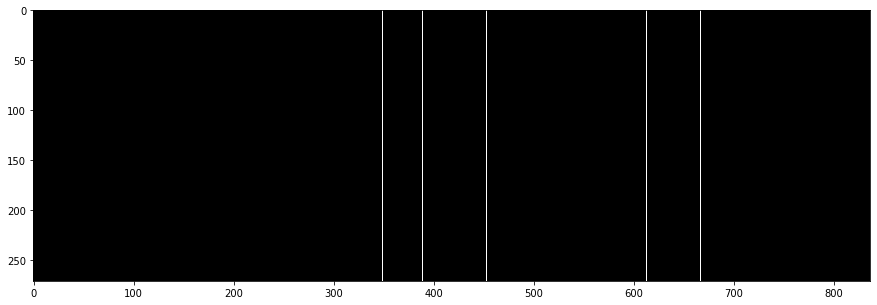

In [44]:
img2 = image_gray2*0
if lines2 is not None:
    for i in range(0, len(lines2)):
        rho = lines2[i][0][0]
        theta = lines2[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img2, pt1, pt2, (255,255,255), 1)
        
plt.figure(figsize=(15,5))
plt.imshow(img2,cmap='gray')

In [19]:
#img = img.astype(np.uint8)
#img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
np.shape(img1)
r,c = np.shape(img1)
division = duration_of_sound1/c
lines_total1 = int(np.sum(img1[100,:])/255)
print(lines_total1)
lines_time1 = np.zeros(lines_total1)
temp=0
for i in range(0,c):
    if img1[100,i] == 255:
        lines_time1[temp]=i
        temp=temp+1
print(lines_time1)
lines_time1 = lines_time1*division
print(lines_time1)

18
[ 43.  95. 135. 187. 199. 254. 293. 345. 359. 412. 452. 517. 569. 611.
 675. 732. 771. 811.]
[0.51538794 1.13864777 1.61807841 2.24133825 2.38516744 3.04438457
 3.51182945 4.13508928 4.30289001 4.9381356  5.41756625 6.19664104
 6.81990087 7.32330304 8.09039207 8.77358073 9.24102561 9.72045625]


In [20]:
np.shape(img2)
r,c = np.shape(img2)
division = duration_of_sound2/c
lines_total2 = int(np.sum(img2[100,:])/255)
print(lines_total2)
lines_time2 = np.zeros(lines_total2)
temp=0
for i in range(0,c):
    if img2[100,i] == 255:
        lines_time2[temp]=i
        temp=temp+1
print(lines_time2)
lines_time2 = lines_time2*division
print(lines_time2)

5
[349. 389. 453. 613. 667.]
[4.16965352 4.64755078 5.41218638 7.32377539 7.96893668]


In [21]:
hash_1 = np.zeros((lines_total1-1,lines_total1-1))
for i in range(0,lines_total1-1):
    temp = lines_time1[i]
    #print(temp)
    temp1 = 0
    for j in range(i+1,lines_total1):
        hash_1[i,temp1] = lines_time1[j]-temp
        #print(lines_time1[j])
        temp1 = temp1+1
print(hash_1)

[[0.62325983 1.10269047 1.72595031 1.8697795  2.52899663 2.99644151
  3.61970134 3.78750207 4.42274767 4.90217831 5.6812531  6.30451293
  6.80791511 7.57500413 8.2581928  8.72563767 9.20506831]
 [0.47943064 1.10269047 1.24651967 1.9057368  2.37318167 2.99644151
  3.16424223 3.79948783 4.27891847 5.05799327 5.6812531  6.18465527
  6.9517443  7.63493296 8.10237784 8.58180848 0.        ]
 [0.62325983 0.76708903 1.42630616 1.89375103 2.51701087 2.68481159
  3.32005719 3.79948783 4.57856262 5.20182246 5.70522463 6.47231366
  7.15550232 7.6229472  8.10237784 0.         0.        ]
 [0.14382919 0.80304632 1.2704912  1.89375103 2.06155176 2.69679736
  3.176228   3.95530279 4.57856262 5.0819648  5.84905382 6.53224249
  6.99968736 7.479118   0.         0.         0.        ]
 [0.65921713 1.12666201 1.74992184 1.91772256 2.55296816 3.03239881
  3.8114736  4.43473343 4.9381356  5.70522463 6.38841329 6.85585817
  7.33528881 0.         0.         0.         0.        ]
 [0.46744488 1.09070471 1.2585

In [22]:
hash_2 = np.zeros((lines_total2-1,lines_total2-1))
for i in range(0, lines_total2-1):
    temp = lines_time2[i]
    temp1=0
    for j in range(i+1,lines_total2):
        hash_2[i,temp1] = lines_time2[j]-temp
        temp1=temp1+1
print(hash_2)

[[0.47789725 1.24253286 3.15412186 3.79928315]
 [0.7646356  2.67622461 3.3213859  0.        ]
 [1.91158901 2.5567503  0.         0.        ]
 [0.64516129 0.         0.         0.        ]]


In [51]:
match = np.zeros((lines_total2-1,lines_total2-1))
time = np.zeros((lines_total2-1,lines_total2-1))
i = 0
i1 = 0
j = 0 
j1 = 0
print('lines_total1 ',lines_total1-1)
print('lines_total2 ',lines_total2-1)
while i< lines_total2-1 and i1<lines_total2-1 and j<lines_total1-1 and j1<lines_total1-1:
    
    print('i',i),
    print('i1',i1),
    print('j',j),
    print('j1',j1)
    temp = hash_2[i,i1]
    print('temp',temp)
    temp1 = hash_1[j,j1]
    print('temp1',temp1)
    
    percent = 1-abs(temp1-temp)/temp
    print('percent',percent)
    if temp==0 and i<lines_total2-2:
        i=i+1
        i1=0
        temp = hash_2[i,i1]
    if temp1==0:
        j=j+1
        j1=0
        temp1 = hash_1[j,j1]
    if percent<0.96 and temp1>temp:
        j = j+1
        j1=0
    elif percent>0.96:
        match[i,i1] = percent
        time[i,i1] = abs(lines_time1[j]-lines_time2[i])
        i1 = i1+1
        j1 = j1+1
        
    elif percent<0.97 and temp1<temp:
        j1=j1+1
        
    if i1==4 and match[i,i1-1] != 0:
        i=i+1
        i1=0
        
    #print('i',i),
    #print('i1',i1),
    #print('j',j),
    #print('j1',j1)

lines_total1  17
lines_total2  4
i 0
i1 0
j 0
j1 0
temp 0.47789725209080025
temp1 0.6232598336028957
percent 0.6958287981859401
i 0
i1 0
j 1
j1 0
temp 0.47789725209080025
temp1 0.4794306412329965
percent 0.9967913832199543
i 0
i1 1
j 1
j1 1
temp 1.2425328554360808
temp1 1.102690474835892
percent 0.8874537763823481
i 0
i1 1
j 1
j1 2
temp 1.2425328554360808
temp1 1.246519667205791
percent 0.9967913832199544
i 0
i1 2
j 1
j1 3
temp 3.1541218637992827
temp1 1.9057367989011615
percent 0.6042051896516183
i 0
i1 2
j 1
j1 4
temp 3.1541218637992827
temp1 2.373181674103333
percent 0.7524064625850341
i 0
i1 2
j 1
j1 5
temp 3.1541218637992827
temp1 2.996441507706229
percent 0.9500081598295886
i 0
i1 2
j 1
j1 6
temp 3.1541218637992827
temp1 3.1642422321377772
percent 0.9967913832199545
i 0
i1 3
j 1
j1 7
temp 3.7992831541218637
temp1 3.799487831771498
percent 0.9999461272978792
i 1
i1 0
j 1
j1 8
temp 0.7646356033452806
temp1 4.278918473004494
percent -3.5960230654761913
i 1
i1 0
j 2
j1 0
temp 0.76463

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


In [52]:
n = np.sum(match>0)
similarity = np.sum(match)/n
print(similarity)

0.9938744973290772


In [53]:
m = np.sum(time>0)
offset_time = np.sum(time)/m
print(offset_time) 

3.122225310673852


In [54]:
print(match)

[[0.99679138 0.99679138 0.99679138 0.99994613]
 [0.99679138 0.99679138 0.99959995 0.        ]
 [0.99066851 0.99852073 0.         0.        ]
 [0.96605274 0.         0.         0.        ]]
